# Pizarra



In [ ]:
from tldraw import TldrawWidget
t = TldrawWidget(width=1502, height = 700)
t

TldrawWidget(height=700, width=1502)

Cálculos para el punto de corte

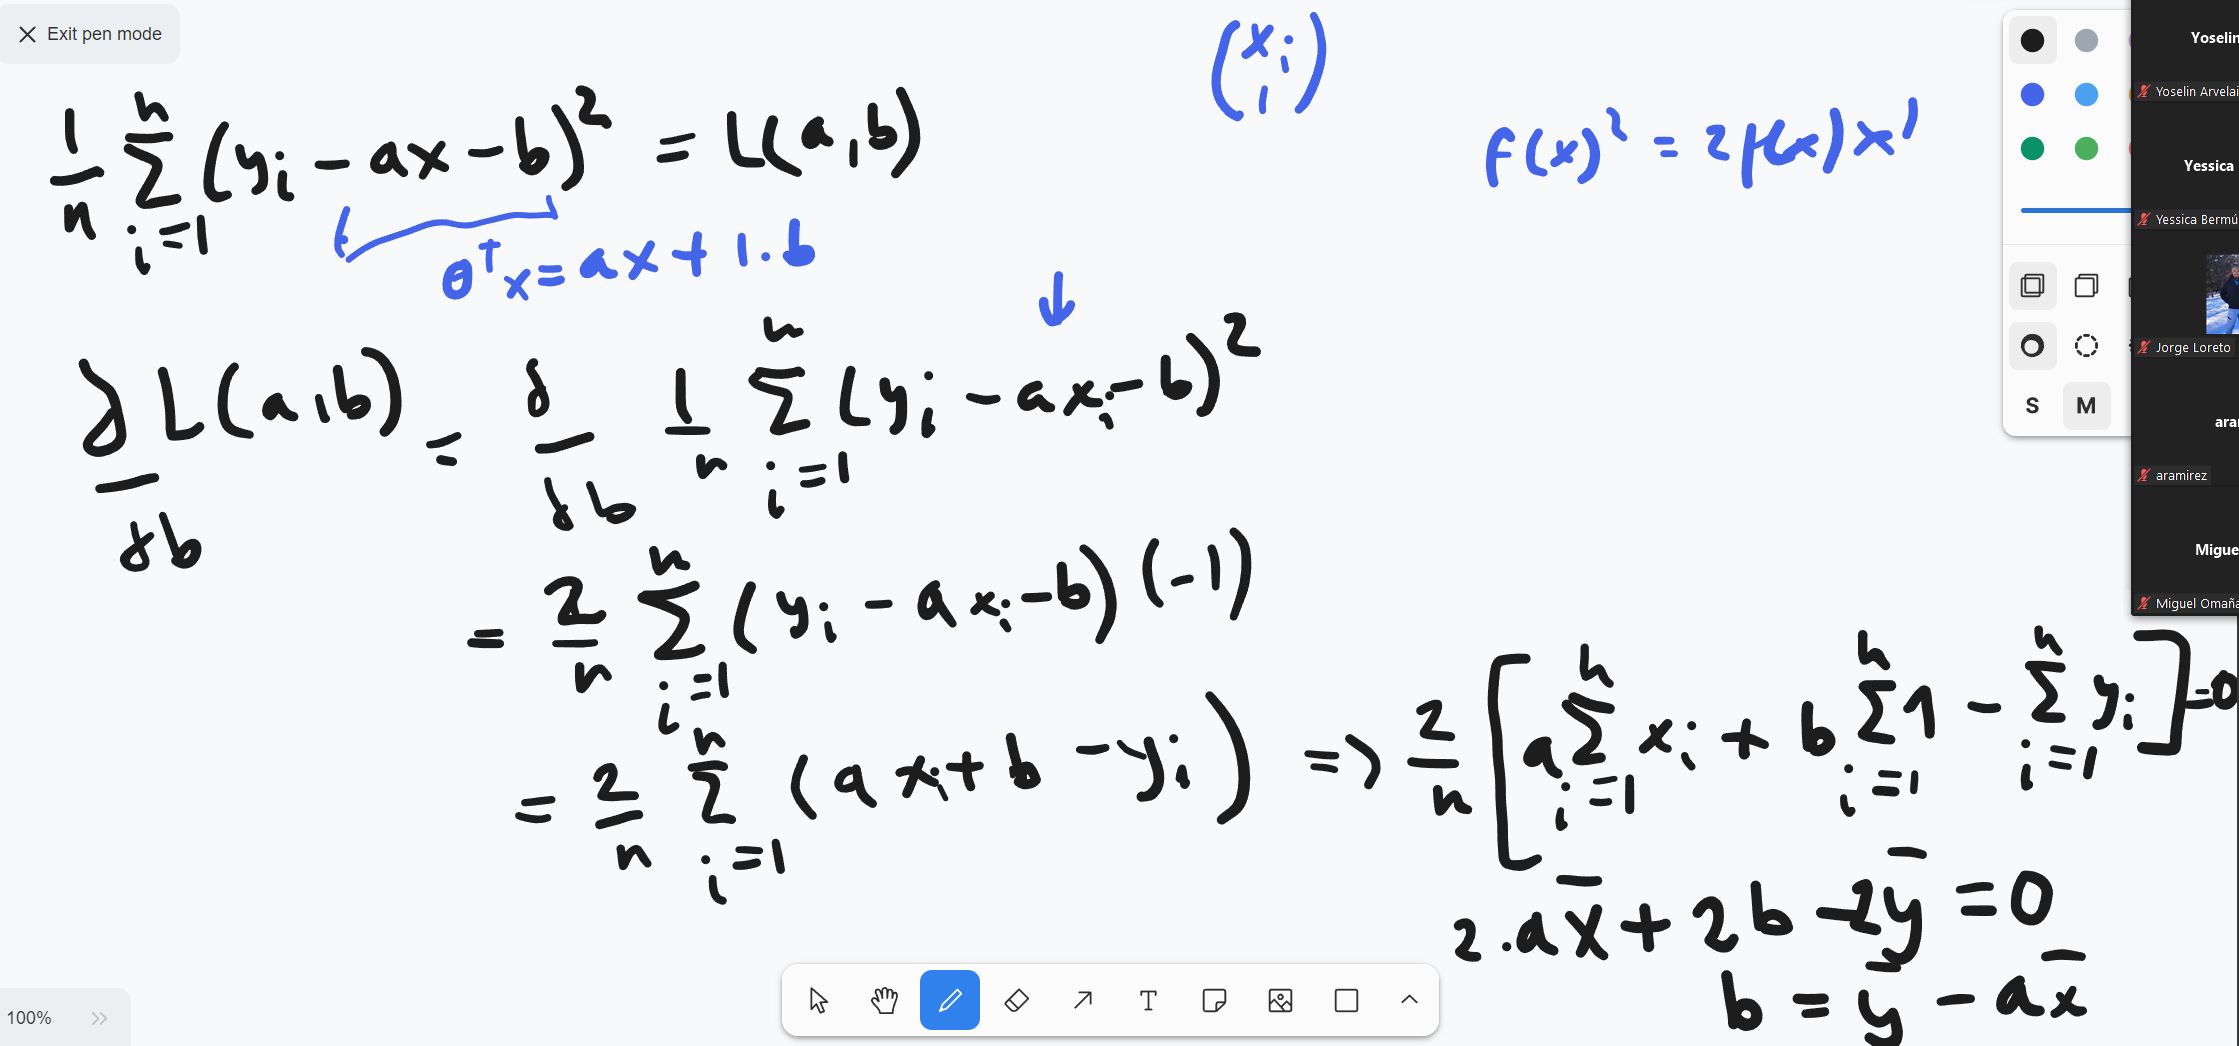

Cálculos para la pendiente

- Tarea: Demostrar que (2) es equivalente a la expresión que derivamos

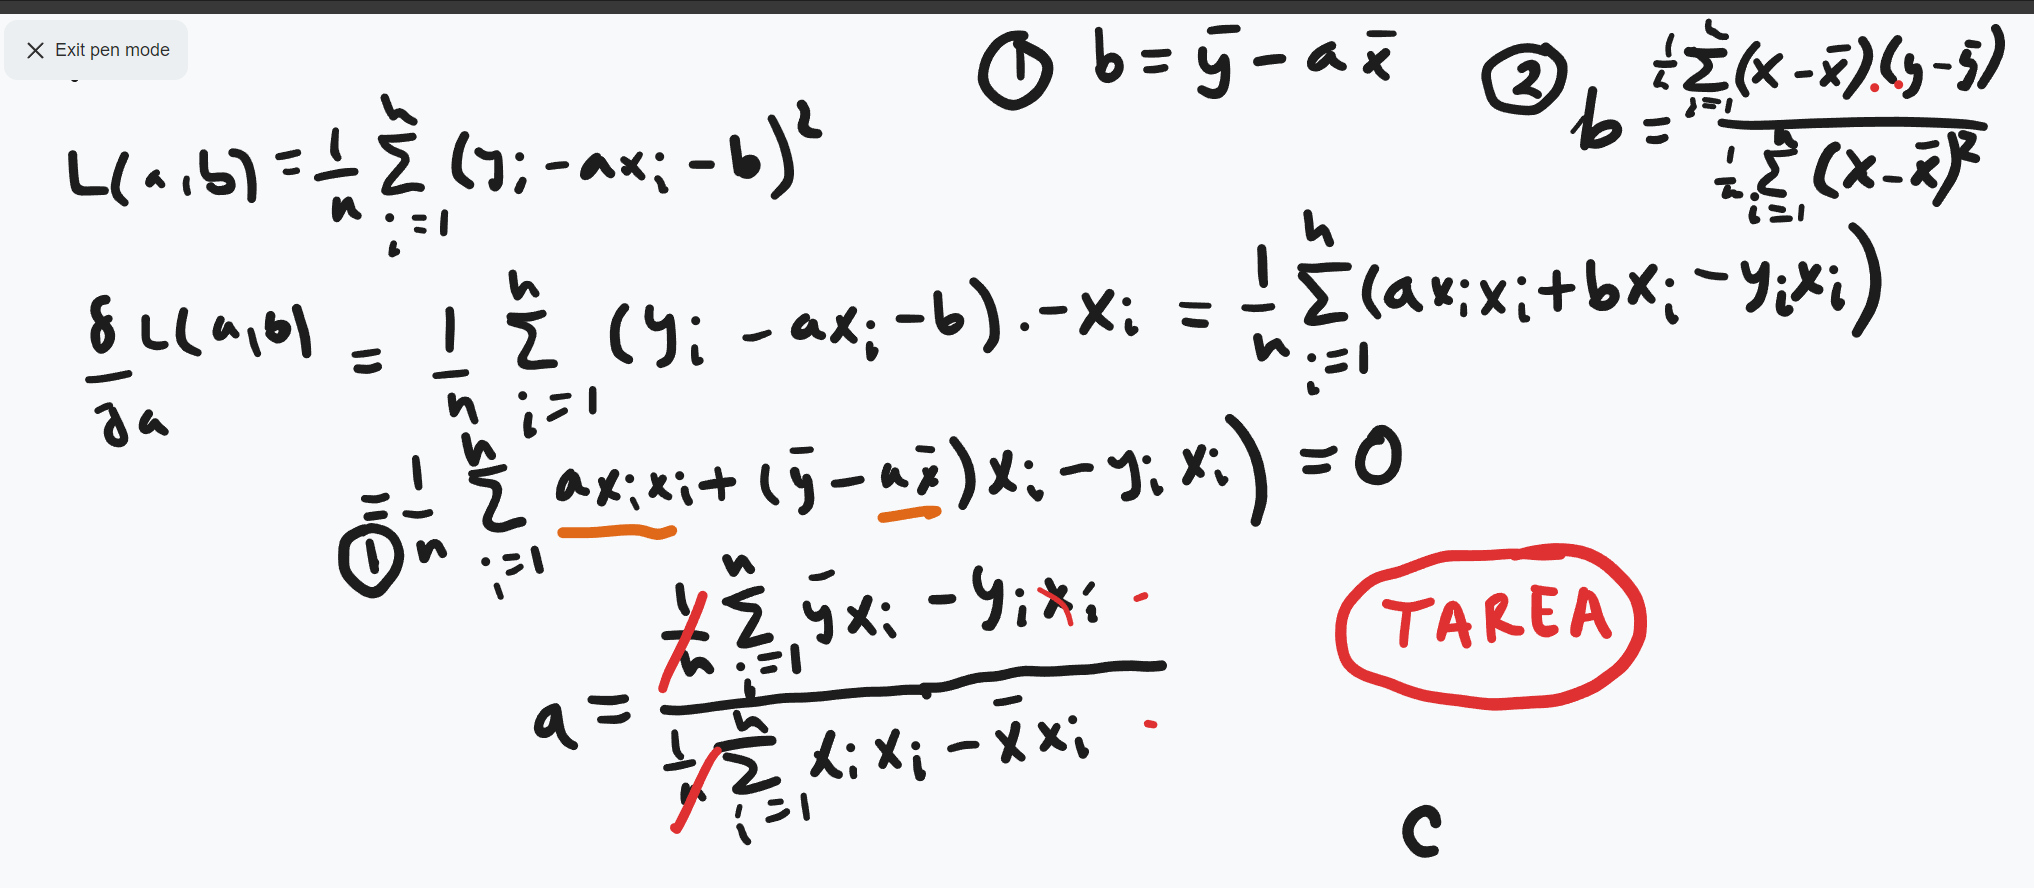

Pregunta interesante: Aumentando la complejidad (grado del polinomio) de la solución

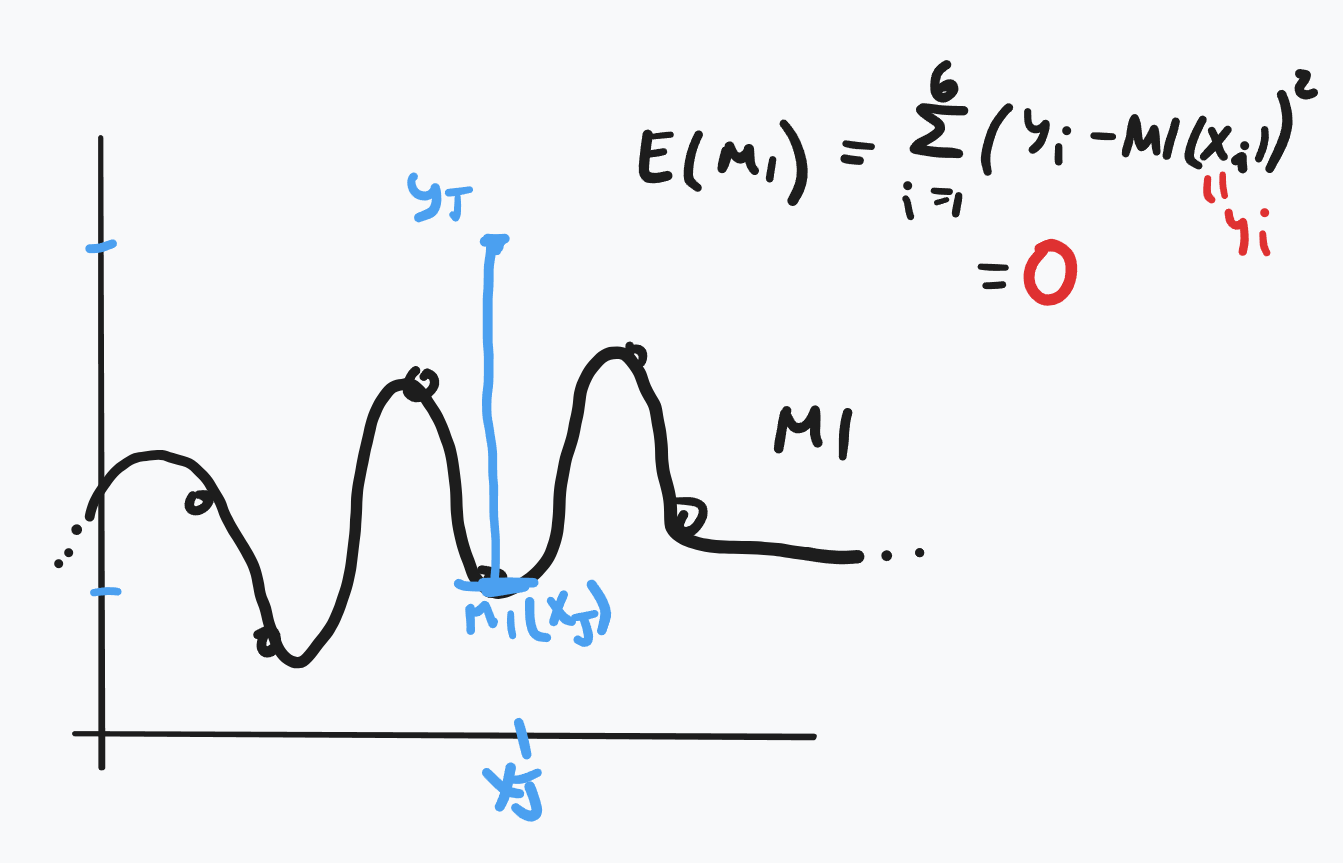

Por qué es mínimo y propiedades de X

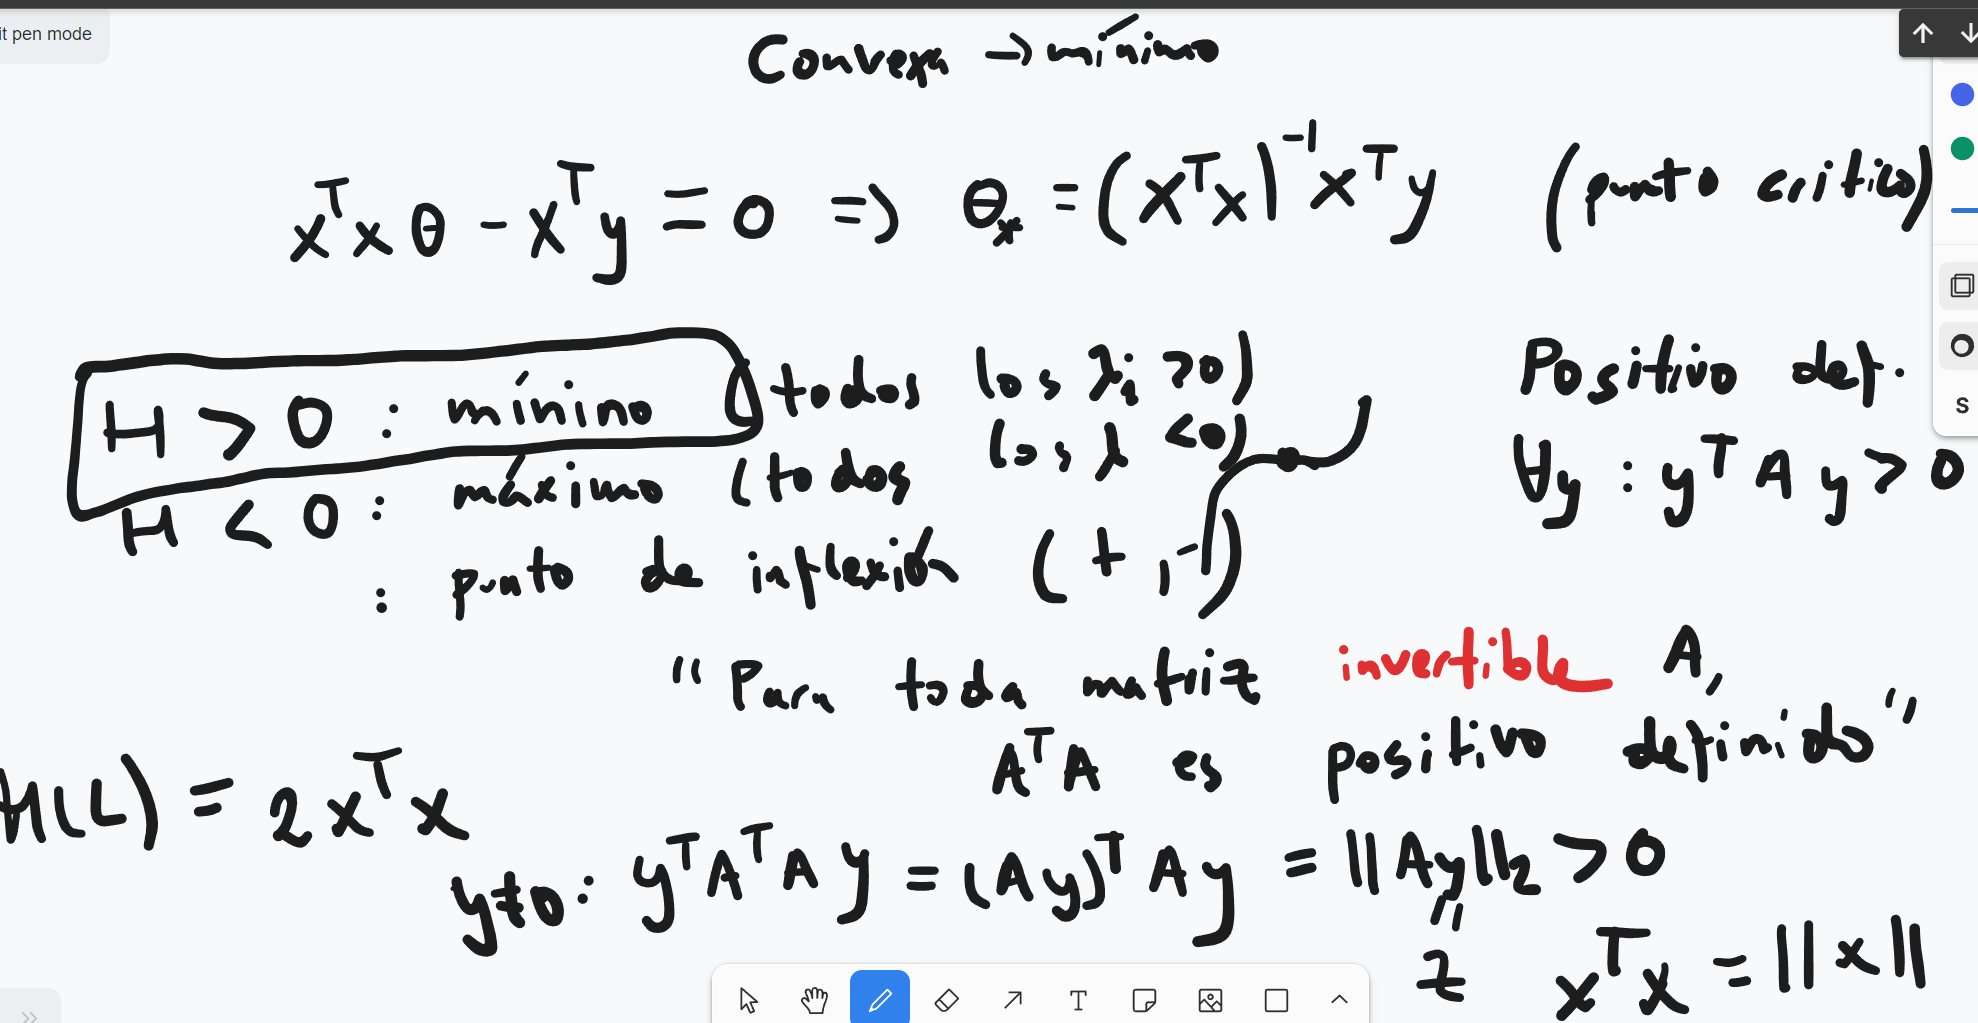

In [ ]:
!pip install tldraw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.4/248.4 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.5 MB/s eta 0:00:00


# 01 Regresión Lineal

- Derivando soluciones
- Usando Scikit-Learn

## Versión v.2
El notebook lo puedo modificar, esta versión es la v.1 a 24/05/2024 a l pm de Caracas.



Autor: Fernando Crema García
Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

# Regresión lineal

Consideremos el problema de Regresión lineal : $$y = \mathbf{X} \theta_* + \epsilon \text{ con }$$

1. $\mathbf{X} \in \mathbb{R}^{n,p}$ *a* nuestra **matriz de datos**.
1. $\epsilon \in \mathbb{R}$ el ruido aleatorio definido como una variable aleatoria Normal con media $0$ y varianza $\sigma^2$, esto es, $\epsilon \sim \mathcal{N}(\mu=0,\,\sigma^{2})$
1. $y \in \mathbb{R}^n$ es nuestro vector a predecir que llamamos comunmente **vector respuesta** y del cual asumimos una relación lineal con $\mathbf{X}$.
1. $\theta_* \in \mathbb{R}^m$ es el modelo óptimo.

Supongamos que tenemos una **muestra aleatoria** de ($X, \mathbf{y}$) de tamaño $n$ para ambas $\mathbf{X}$ y $y$ entonces $X \in \mathbb{R}^{n \times p}$ y $\mathbf{y} \in \mathbb{R}^n$. El obketivo principal es conseguir $\theta_*$.

### Formulación de regresión lineal:

El problema a resolver es:

$$OLS\;\;\underset{\theta,\mathbf{\hat{e}}}{min}\;\;\frac{1}{2}\|\mathbf{\hat{e}}\|_2^2\;\;s.t.$$
$$\mathbf{y} - X \theta = \mathbf{\hat{e}}$$
$$\theta \in \mathbb{R}^p,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times p}$$

## Derivando las ecuaciones normales

### Solución analítica (Ecuaciones normales)

$$ X^T X \theta = X^T y \Rightarrow \theta = (X^T X)^{-1}X^T y $$

## Nuestro primer modelo

In [ ]:
import numpy as np


In [ ]:
x = np.random.randn(10)

In [ ]:
np.size(x)

10

In [ ]:
ones = np.ones(10)

In [ ]:
X = np.stack([x, ones], axis=1)

In [ ]:
np.size(X)

20

In [ ]:
X


array([[-0.8080633 ,  1.        ],
       [-0.2500174 ,  1.        ],
       [ 0.98161629,  1.        ],
       [-0.32656151,  1.        ],
       [-0.88471539,  1.        ],
       [ 1.65161928,  1.        ],
       [ 2.82752818,  1.        ],
       [-0.96407817,  1.        ],
       [ 0.48651643,  1.        ],
       [ 0.16247403,  1.        ]])

In [ ]:
np.matrix?

In [ ]:
input_matrix = []

# Tuple
for xi, onesi in zip(x, ones):
  input_matrix.append("{} {}".format(xi, onesi))

X = np.matrix(";".join(input_matrix))

In [ ]:
X

matrix([[-0.8080633 ,  1.        ],
        [-0.2500174 ,  1.        ],
        [ 0.98161629,  1.        ],
        [-0.32656151,  1.        ],
        [-0.88471539,  1.        ],
        [ 1.65161928,  1.        ],
        [ 2.82752818,  1.        ],
        [-0.96407817,  1.        ],
        [ 0.48651643,  1.        ],
        [ 0.16247403,  1.        ]])

In [ ]:
X

matrix([[ 0.21262992,  1.        ],
        [-1.4821317 ,  1.        ],
        [-0.02905379,  1.        ],
        [-0.31234722,  1.        ],
        [ 0.05402455,  1.        ],
        [ 1.69872219,  1.        ],
        [ 2.37489091,  1.        ],
        [-0.74516778,  1.        ],
        [-1.31825004,  1.        ],
        [-1.46539355,  1.        ]])

## Modelo teórico

In [ ]:
beta_star = np.array([2.0, 3.0])

In [ ]:
y = np.dot(X, beta_star)

In [ ]:
y

matrix([[1.3838734 , 2.4999652 , 4.96323258, 2.34687698, 1.23056921,
         6.30323856, 8.65505636, 1.07184366, 3.97303287, 3.32494805]])

y.size(

In [ ]:
type(y)

numpy.matrix

### viendo la componente $y_1$

matrix([[1.3838734 , 2.4999652 , 4.96323258, 2.34687698, 1.23056921,
         6.30323856, 8.65505636, 1.07184366, 3.97303287, 3.32494805]])

In [ ]:
y[0][0] * 2.0 + 3.0

matrix([[ 5.7677468 ,  7.9999304 , 12.92646515,  7.69375395,  5.46113842,
         15.60647713, 20.31011272,  5.14368732, 10.94606574,  9.6498961 ]])

## Buscar las soluciones usando las ecuaciones normales

In [ ]:
from numpy.linalg import inv as inversa

In [ ]:
import pandas as pd

$\beta_* = (X^T X)^{-1} X^{T} y $

In [ ]:
def ecuaciones_normales_no(X, y):
  """
  :param X: La matriz de datos
  :param y: El vector de observaciones



  :returns: El vector beta estrella
  """

  return np.dot(np.dot(inversa(np.dot(X.T, X), X.T, y)))


In [ ]:
def ecuaciones_normales(X, y):
  """
  :param X: La matriz de datos
  :param y: El vector de observaciones



  :returns: El vector beta estrella
  """

  return inversa(X.T @ X) @ X.T @ y

In [ ]:
X @ beta_star

matrix([[1.3838734 , 2.4999652 , 4.96323258, 2.34687698, 1.23056921,
         6.30323856, 8.65505636, 1.07184366, 3.97303287, 3.32494805]])

### Transpuesta

In [ ]:
np.transpose(X)

matrix([[-0.8080633 , -0.2500174 ,  0.98161629, -0.32656151, -0.88471539,
          1.65161928,  2.82752818, -0.96407817,  0.48651643,  0.16247403],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [ ]:
X.T

matrix([[-0.8080633 , -0.2500174 ,  0.98161629, -0.32656151, -0.88471539,
          1.65161928,  2.82752818, -0.96407817,  0.48651643,  0.16247403],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

## Probando el método

In [ ]:
beta_star

array([2., 3.])

In [ ]:
y

matrix([[1.3838734 , 2.4999652 , 4.96323258, 2.34687698, 1.23056921,
         6.30323856, 8.65505636, 1.07184366, 3.97303287, 3.32494805]])

In [ ]:
y = y.reshape(10, 1)

In [ ]:
X

matrix([[ 0.21262992,  1.        ],
        [-1.4821317 ,  1.        ],
        [-0.02905379,  1.        ],
        [-0.31234722,  1.        ],
        [ 0.05402455,  1.        ],
        [ 1.69872219,  1.        ],
        [ 2.37489091,  1.        ],
        [-0.74516778,  1.        ],
        [-1.31825004,  1.        ],
        [-1.46539355,  1.        ]])

In [ ]:
ecuaciones_normales(X, y)

matrix([[2.],
        [3.]])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install <paquete>

In [ ]:
beta_star = beta_star.reshape(2, 1)

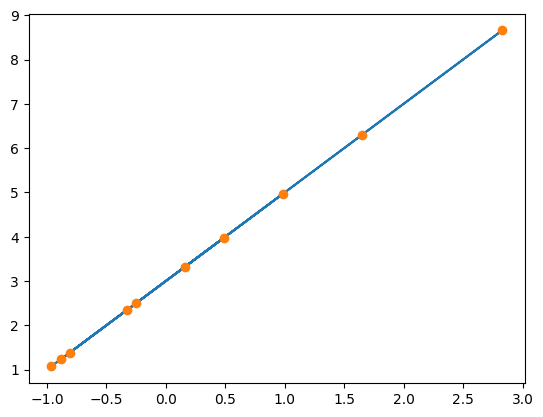

In [ ]:
plt.plot(X[:, 0], X @ beta_star, X[:, 0], y, 'o')

## Agregando ruido

In [ ]:
# np.random.randn ~ N(0, 1)  en clases vimos que el ruido N(0, sigma)
# Las columnas ahora siguen Y = 30 X + 10 + ruido
X = np.stack([np.random.randn(1000), np.ones(1000)], axis=1)

In [ ]:
X

array([[-1.07445498,  1.        ],
       [ 2.26035941,  1.        ],
       [ 0.05507815,  1.        ],
       ...,
       [-0.22494241,  1.        ],
       [-1.87232309,  1.        ],
       [-0.57393463,  1.        ]])

In [ ]:
beta = np.array([30, 10])

### Sobrecarga de operadores

np.random.randn() -> un valor en R lo multiplico por 5

In [ ]:
y = X @ beta + 5*np.random.randn(1000)

In [ ]:
y

In [ ]:
beta_star_nuevo = ecuaciones_normales(X, y)

In [ ]:
beta_star_nuevo

array([29.93435641,  9.91365681])

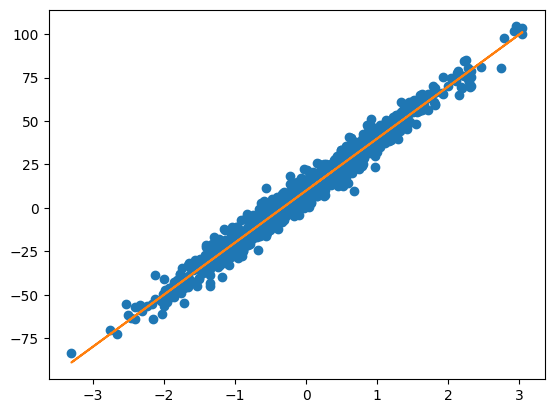

In [ ]:
plt.plot( X[:, 0], y, 'o', X[:, 0], X @ beta_star_nuevo)

In [ ]:
from sklearn.linear_model import LinearRegression

En general, todos los objetos (names) de SK Learn tienen asociado el método fit (entrenar). Si es un problema de regresión o de clasificación buscamos $f(X) = y$ como tenemos nuestros datos $X$ y el vector de salidas $y$ el método siempre recibe ambas en ese orden.

In [ ]:
model = LinearRegression().fit(X, y)

### Tres opciones para generar el modelo usando SK Learn

In [ ]:
# Abre un menu al lado derecho con métodos, parámetros y ejemplos de uso del modelo

model?

coef_ siempre tendrá los parámetros entrenamos de $\beta$ SIN el punto de corte

In [ ]:
model.coef_

array([29.93435641,  0.        ])

el punto de corte que en clases hemos llamado $\beta_0$ está en intercept_

In [ ]:
model.intercept_

10.027010864725078

La primera manera de entrenar es agregando la columna de 1s y quitando el intercept

In [ ]:
model1 = LinearRegression(fit_intercept=False).fit(X, y)

In [ ]:
model1.coef_

array([29.99734383, 10.02701086])

In [ ]:
model1.intercept_

0.0

La segunda manera de entrenar es usando solamente los datos relevantes (columna sin 1s) y el intercept tendrá el punto de corte porque fit_intercept no es False

In [ ]:
model3 = LinearRegression().fit(X[:, 0].reshape(1000, 1), y)

In [ ]:
model3.coef_

array([29.93435641])

In [ ]:
model3.intercept_

9.913656812204634

Por último, el $\beta^*$ lo podemos crear concatenando ambos valores. Sin embargo, TAREA: existe una manera de obtener el modelo como parámetro.

In [ ]:
beta_star_scikit = np.array([model3.coef_[0], model3.intercept_])

In [ ]:
beta_star_scikit

array([29.99734383, 10.02701086])

Nos da el mismo modelo que usando las ecuaciones normales

In [ ]:
array([29.99734383, 10.02701086])

### Comentarios

1. No nos da 30, 10 exactamente por el ruido asociado.
1. Si el ruido asociado sigue N(0, sigma) entonces regresión lineal debería funcionar bien
1. Si el ruido asociado NO es normal, no va a funcionar bien.

## Cómo sabemos que un modelo "es bueno"?

Gráfico tomado de [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

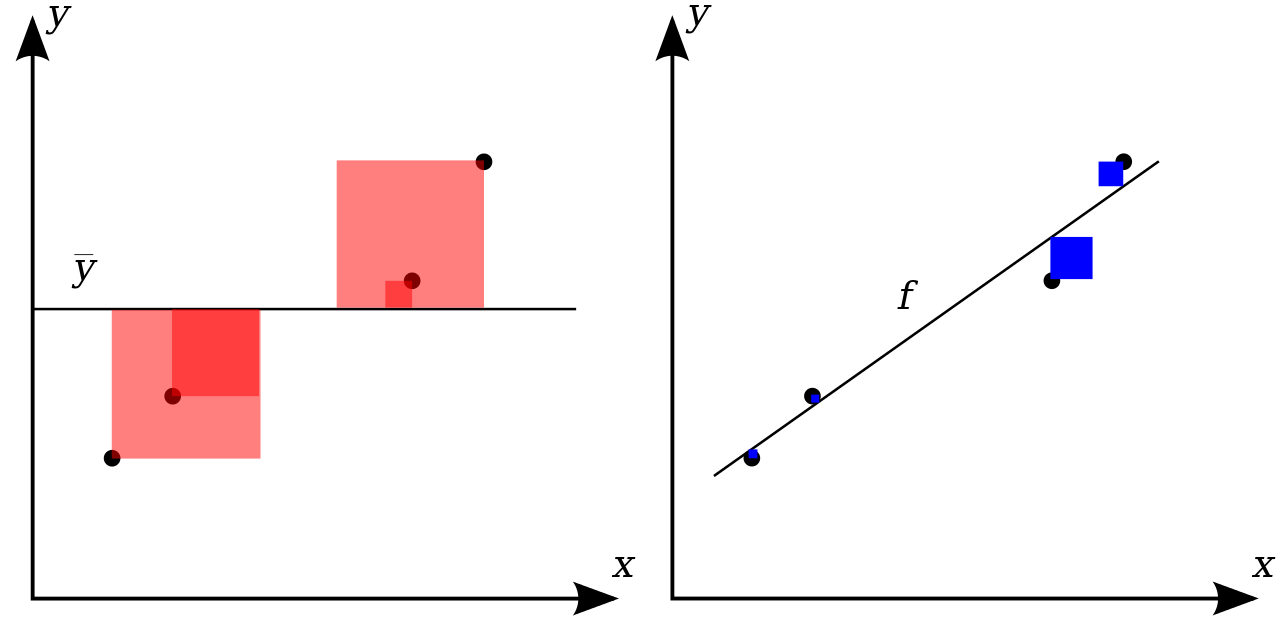

$$R^2=1-\frac{\color{blue}{S S_{\mathrm{res}}}}{\color{red}{S S_{\mathrm{tot}}}}$$

De donde $$\color{blue}{S S_{\mathrm{res}}} = \sum_i\left(y_i-f(x_i)\right)^2=\sum_i e_i^2  $$ y $$\color{red}{S S_{\mathrm{tot}}} = S S_{\mathrm{tot}}=\sum_i\left(y_i-\bar{y}\right)^2 $$

1. Vean como el denominador es **constante** para todos los posibles modelos!
1. Cuáles son los posibles valores de $R^2$

